Standard Imports

In [1]:
import altair as alt
import pandas as pd
import numpy as np
import panel as pn
pn.extension('vega')
import matplotlib.pyplot as plot
%matplotlib inline
from math import log2
from sklearn import tree 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Read player tracking data, drop qualitative features

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/viswanath-kasireddy/CS370/main/Stat%20Tracking%20-%20Sheet1-2.csv')
df = df.drop('Player', 1)
df = df.drop('Game', 1)
df = df[:-1]
X = df.drop('Win_Loss',axis = 1)
y = df.Win_Loss

Format player tracking data for visualizations

In [3]:
from vega_datasets import data
url = "https://raw.githubusercontent.com/viswanath-kasireddy/CS370/main/Stat%20Tracking%20-%20Sheet1-2.csv"
vf = pd.read_csv(url)
vf.dropna()
#vf = vf.drop('Player', 1)
#vf = vf.drop('Game', 1)
vf = vf[:-1]

Create Offensive Stat Visualizations

In [4]:
scale = alt.Scale(
    domain=[70, 110, 190],
    range=['purple', 'white', 'green'],
    type='linear'
)

RimFinishing = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Rim finishing:Q',
    color=alt.Color("ORTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
               alt.Tooltip('Rim finishing:Q'),
               alt.Tooltip('ORTG:Q')
              ]
).properties(width=1000)

In [5]:
scale = alt.Scale(
    domain=[70, 110, 190],
    range=['purple', 'white', 'green'],
    type='linear'
)

PerimeterScoring = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Perimeter scoring:Q',
    color=alt.Color("ORTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
                alt.Tooltip('Perimeter scoring:Q'),
               alt.Tooltip('ORTG:Q')
              ]
).properties(width=1000)

In [6]:
scale = alt.Scale(
    domain=[70, 110, 190],
    range=['purple', 'white', 'green'],
    type='linear'
)

MidRange = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Midrange scoring:Q',
    color=alt.Color("ORTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
                alt.Tooltip('Midrange scoring:Q'),
               alt.Tooltip('ORTG:Q')
              ]
).properties(width=1000)

In [7]:
scale = alt.Scale(
    domain=[70, 110, 190],
    range=['purple', 'white', 'green'],
    type='linear'
)

Iso = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Isolation scoring:Q',
    color=alt.Color("ORTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
                alt.Tooltip('Isolation scoring:Q'),
               alt.Tooltip('ORTG:Q')
              ]
).properties(width=1000)

In [8]:
scale = alt.Scale(
    domain=[70, 110, 190],
    range=['purple', 'white', 'green'],
    type='linear'
)

OffballC = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Offball creation:Q',
    color=alt.Color("ORTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
                alt.Tooltip('Offball creation:Q'),
               alt.Tooltip('ORTG:Q')
              ]
).properties(width=1000)

In [9]:
scale = alt.Scale(
    domain=[70, 110, 190],
    range=['purple', 'white', 'green'],
    type='linear'
)

OnballC = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Onball creation:Q',
    color=alt.Color("ORTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
                alt.Tooltip('Onball creation:Q'),
               alt.Tooltip('ORTG:Q')
              ]
).properties(width=1000)

In [10]:
scale = alt.Scale(
    domain=[70, 110, 190],
    range=['purple', 'white', 'green'],
    type='linear'
)

OffballS = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Offball scoring:Q',
    color=alt.Color("ORTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
                alt.Tooltip('Offball scoring:Q'),
               alt.Tooltip('ORTG:Q')
              ]
).properties(width=1000)

In [11]:
scale = alt.Scale(
    domain=[70, 110, 190],
    range=['purple', 'white', 'green'],
    type='linear'
)

OnballS = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Onball scoring:Q',
    color=alt.Color("ORTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
                alt.Tooltip('Onball scoring:Q'),
               alt.Tooltip('ORTG:Q')
              ]
).properties(width=1000)

In [12]:
scale = alt.Scale(
    domain=[70, 110, 190],
    range=['purple', 'white', 'green'],
    type='linear'
)

ContestedM = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Contested Shot Making:Q',
    color=alt.Color("ORTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
                alt.Tooltip('Contested Shot Making:Q'),
               alt.Tooltip('ORTG:Q')
              ]
).properties(width=1000)

Create tab with all offensive stat visualizations


In [13]:
offensive = pn.Tabs()
offensive.append(('Rim Finishing', RimFinishing))
offensive.append(('Perimeter scoring', PerimeterScoring))
offensive.append(('Midrange scoring', MidRange))
offensive.append(('Isolation scoring', Iso))
offensive.append(('Offball creation', OffballC))
offensive.append(('Onball creation', OnballC))
offensive.append(('Offball scoring', OffballS))
offensive.append(('Onball scoring', OnballS))
offensive.append(('Contested Shot Making', ContestedM))
#offensive

Create defensive stat visualizations


In [14]:
scale = alt.Scale(
    domain=[80, 110, 130],
    range=['green', 'white', 'purple'],
    type='linear'
)

Help = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Help Defense/Proper Rotation:Q',
    color=alt.Color("DRTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
               alt.Tooltip('Help Defense/Proper Rotation:Q'),
               alt.Tooltip('DRTG:Q')
              ]
).properties(width=1000)

IsoD = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Isolation Defense:Q',
    color=alt.Color("DRTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
               alt.Tooltip('Isolation Defense:Q'),
               alt.Tooltip('DRTG:Q')
              ]
).properties(width=1000)

SC = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Shot contest:Q',
    color=alt.Color("DRTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
               alt.Tooltip('Shot contest:Q'),
               alt.Tooltip('DRTG:Q')
              ]
).properties(width=1000)

RP = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Rim Protection:Q',
    color=alt.Color("DRTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
               alt.Tooltip('Rim Protection:Q'),
               alt.Tooltip('DRTG:Q')
              ]
).properties(width=1000)

PD = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Perimeter Defense:Q',
    color=alt.Color("DRTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
               alt.Tooltip('Perimeter Defense:Q'),
               alt.Tooltip('DRTG:Q')
              ]
).properties(width=1000)

ID = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Interior Defense:Q',
    color=alt.Color("DRTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
               alt.Tooltip('Interior Defense:Q'),
               alt.Tooltip('DRTG:Q')
              ]
).properties(width=1000)

OD = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Offball defense:Q',
    color=alt.Color("DRTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
               alt.Tooltip('Offball defense:Q'),
               alt.Tooltip('DRTG:Q')
              ]
).properties(width=1000)

PnR = alt.Chart(vf).mark_circle(size=70).encode(
    x='Player:N',
    y = 'Pick and roll defense:Q',
    color=alt.Color("DRTG",scale = scale),
     tooltip = [alt.Tooltip('Player:N'),
               alt.Tooltip('Game:N'),
               alt.Tooltip('Pick and roll defense:Q'),
               alt.Tooltip('DRTG:Q')
              ]
).properties(width=1000)


Create tab with all defensive stat visualizations


In [15]:
defensive = pn.Tabs()
defensive.append(('Help Defense/ Proper Rotation', Help))
defensive.append(('Isolation Defense', IsoD))
defensive.append(('Shot Contest', SC))
defensive.append(('Rim Protection', RP))
defensive.append(('Perimeter Defense', PD))
defensive.append(('Interior Defense', ID))
defensive.append(('Offball Defense', OD))
defensive.append(('Pick and Roll Defense', PnR))

Acquiring data from basketball reference, using per game stats and advanced stats

In [16]:
df_p = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_per_game.html#per_game_stats')[0]
df_a = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_advanced.html#advanced_stats')[0]
#df_s = pd.read_csv('https://raw.githubusercontent.com/viswanath-kasireddy/CS370/main/ShootingStats.csv')
df_p = df_p[df_p['Rk']!='Rk']
df_a = df_a[df_a['Rk']!='Rk']
df_p = df_p.drop(['Rk','Age','Unnamed: 30','Unnamed: 31', 'Tm', 'Pos', 'G', 'GS'], axis=1, errors='ignore')
#df_s = df_s.drop(['Rk', 'Age','Pos','Tm','Player','G','MP'],axis = 1,errors = 'ignore')
df_a = df_a.drop(['Rk', 'Age', 'Pos', 'Tm', 'Unnamed: 19', 'Unnamed: 24','Player','G','MP'], axis=1, errors ='ignore')
#df_s = df_s.drop(['Unnamed: 0_level_0'])
df_a.reset_index(drop=True, inplace=True)
#df_s.reset_index(drop=True, inplace=True)
df_p.reset_index(drop=True, inplace=True)
totalStats = pd.concat([df_p,df_a],axis = 1)
for col in totalStats.columns:
  if(col != 'Player'):
    totalStats[col] = totalStats[col].astype(float)
totalStats
totalStats = totalStats[totalStats.MP>=10]

Clean data

In [17]:
df_p = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_per_game.html#per_game_stats')[0]
df_a = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_advanced.html#advanced_stats')[0]
df_p = df_p[df_p['Rk']!='Rk']
df_a = df_a[df_a['Rk']!='Rk']
df_p = df_p.drop(['Rk','Age','Unnamed: 30','Unnamed: 31', 'Tm', 'Pos', 'G', 'GS'], axis=1, errors='ignore')
df_a = df_a.drop(['Rk', 'Age', 'Pos', 'Tm', 'Unnamed: 19', 'Unnamed: 24','Player','G','MP'], axis=1, errors ='ignore')
#df_s = df_s.drop(['Unnamed: 0_level_0'])
df_a.reset_index(drop=True, inplace=True)
df_p.reset_index(drop=True, inplace=True)
total = pd.concat([df_p,df_a],axis = 1)
for col in total.columns:
  if(col != 'Player'):
    total[col] = total[col].astype(float)
total = total[total.MP>=15]
#index_names = total[total['MP']<=15].index
#df_c.drop(index_names, inplace= True)
#df_c.drop(columns=['MP'],axis = 1, inplace = True)
#df_c
total = total.drop_duplicates()
total.fillna(0,inplace=True)
players = total.iloc[:,0]
total.drop(columns=['Player'],axis = 1, inplace = True)
totalC = total
total = (total - total.mean())/total.std()
for col in total.columns:
  if(col != 'Player'):
    total[col] = total[col].astype(float)
#scaler = preprocessing.StandardScaler()
#scaled_total = scaler.fit_transform(total)
#total.insert(0, 'Player', players)
totalC

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
2,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,15.1,0.596,0.010,0.438,14.4,20.4,17.4,9.1,1.6,2.2,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
3,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,22.7,0.626,0.010,0.443,7.7,22.6,15.3,26.9,1.7,3.2,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
4,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,0.505,0.525,1.6,1.8,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,15.7,0.556,0.270,0.159,3.0,15.8,9.4,11.0,0.8,3.7,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3
5,25.9,5.5,11.8,0.464,1.3,3.6,0.360,4.2,8.2,0.509,0.518,1.5,1.8,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7,15.1,0.545,0.302,0.149,3.3,15.4,9.2,10.2,0.7,2.8,7.0,22.7,0.3,0.5,0.8,0.067,-0.2,-0.7,-0.9,0.2
6,26.0,5.0,9.6,0.521,0.8,1.0,0.800,4.2,8.6,0.488,0.563,2.0,2.0,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8,18.2,0.611,0.104,0.208,1.8,17.8,10.2,14.3,1.1,7.4,11.8,19.9,0.2,0.2,0.4,0.135,0.1,2.1,2.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.500,0.536,1.1,1.3,0.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,15.9,0.563,0.369,0.160,4.4,12.5,8.4,18.9,3.0,1.3,12.7,17.1,0.8,0.5,1.3,0.092,0.5,0.6,1.2,0.6
701,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.580,0.568,1.0,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,20.3,0.578,0.068,0.171,11.4,16.9,14.2,27.1,2.2,2.1,16.1,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2
702,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,23.0,0.589,0.357,0.491,2.0,10.5,6.3,45.5,1.2,0.5,16.2,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0
703,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,0.598,0.565,1.8,2.5,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,18.2,0.599,0.086,0.367,12.6,22.9,17.7,13.2,1.3,1.7,11.9,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4


Run KMeans clustering algorithm, using 10 features and 6 clusters (determined through Principal Component analysis)

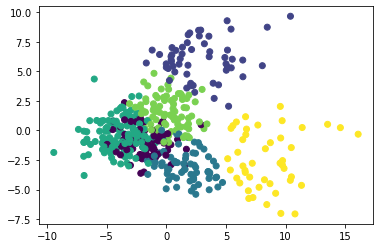

In [18]:
cluster = KMeans(n_clusters=6).fit(PCA(n_components=10, whiten= False).fit_transform(total))
total['cluster_label'] = cluster.labels_
pca_2 = PCA(10)
plot_columns = pca_2.fit_transform(total)
plot.scatter(x=plot_columns[:,0], y = plot_columns[:,1], c = cluster.labels_)
totalC['cluster_label'] = cluster.labels_
totalC.insert(0, 'Player', players)
Clusters = alt.Chart(totalC).mark_circle(size=40).encode(
    x='PTS:Q',
    y = 'VORP:Q',
    color=alt.Color('cluster_label:O', scale=alt.Scale(domain = ['0', '1', '2', '3', '4', '5'], range = ['red', 'blue', 'green', 'purple', 'orange', 'yellow'])),
     tooltip = [alt.Tooltip('Player:N'),
                alt.Tooltip('PTS:Q'),
                alt.Tooltip('TRB:Q'),
                alt.Tooltip('AST:Q'),
                alt.Tooltip('STL:Q'),
                alt.Tooltip('BLK:Q'),
                alt.Tooltip('TS%:Q'),
              ]
).properties(width=1000).interactive()




Group together all charts (Cluster, Offensive Stats, Defensive Stats)

In [19]:
total = pn.Tabs()
total.append(('Players', Clusters))
total.append(('Offensive Stat Leaders', offensive))
total.append(('Defensive Stat Leaders', defensive))
total 

Tabs
    [0] Vega(Chart, name='Players')
    [1] Tabs
        [0] Vega(Chart, name='Rim Finishing')
        [1] Vega(Chart, name='Perimeter scoring')
        [2] Vega(Chart, name='Midrange scoring')
        [3] Vega(Chart, name='Isolation scoring')
        [4] Vega(Chart, name='Offball creation')
        [5] Vega(Chart, name='Onball creation')
        [6] Vega(Chart, name='Offball scoring')
        [7] Vega(Chart, name='Onball scoring')
        [8] Vega(Chart, name='Contested Shot Making')
    [2] Tabs
        [0] Vega(Chart, name='Help Defense/ P...)
        [1] Vega(Chart, name='Isolation Defense')
        [2] Vega(Chart, name='Shot Contest')
        [3] Vega(Chart, name='Rim Protection')
        [4] Vega(Chart, name='Perimeter Defense')
        [5] Vega(Chart, name='Interior Defense')
        [6] Vega(Chart, name='Offball Defense')
        [7] Vega(Chart, name='Pick and Roll Defense')

In [20]:
#from google.colab import drive
#with open('/content/gdrive/My Drive/file.txt', 'w') as f:
#  f.write('total.html')

In [21]:
#import os
#print( os.getcwd() )
#print( os.listdir() )

In [22]:
#from google.colab import files
#files.download( 'total.html' )    